In this notebook I will summarize the Sea Patches cruise data from the Tromsøflaket region. 

    - I will select data that overlap with the area the SB covered between June 21st and June 29th.
    - Map SB path and SP stations to select relevant stations.
    - If stations and trajectory overlap a bit in time and space I will keep it separate per stations. Otherwise I will add them together and use the values as an indication of the assemblage all across the SB sampling area (volume) Limit to depth.
    


# Tromsøflaket Bio Analysis


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

## Setting Lat/Lon boundaries
### Sailbuoy sampling area

In [3]:
SB_env_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SB_env_tromsøflaket2018.xlsx',header=0)

In [4]:
lon_min = np.min(SB_env_df['longitude (deg)'])
lon_max = np.max(SB_env_df['longitude (deg)'])

lat_min = np.min(SB_env_df['latitude (deg)'])
lat_max = np.max(SB_env_df['latitude (deg)'])

In [5]:
def geoplot(filepath, offx=0.0, offy=0.0, plot = True):
    """
    Mandatory: 
    filepath
    Give the routine the name of the file, and it will return the georeference
    as well as the picture to plot.

    Optional:
    offx: Offset in x-direction (if you want to change the axis)
    offy: Offset in y-direction ( --||-- )
    plot: Set "plot=True" if you wish to let geoplot do the plotting for you
    From Håvard 02.04.20
    """
    
    if filepath[-3:]=='jpg':
        filepath = filepath.split('.jpg')[0]

    if filepath[-3:]=='jgw':
        filepath = filepath.split('.jgw')[0]


    # Last inn selve bildet
    img   = mpimg.imread(filepath+'.jpg')

    # Last inn x-y koordinater, samt steglengde
    tmp   = open(filepath+'.jgw')
    tmp   = tmp.read().split('\n')
    A     = float(tmp[0])
    D     = float(tmp[1])
    B     = float(tmp[2])
    E     = float(tmp[3])
    xw    = float(tmp[4])
    yn    = float(tmp[5])

    # Finner antall pixler i hver retning
    xpx   = len(img[0,:,0])
    ypx   = len(img[:,0,0])

    # Gjør transformasjonen for å få ut x-y på andre kanten
    x     = np.zeros((xpx, ypx))
    y     = np.zeros((xpx, ypx))

    xe    = A*xpx + B*ypx + xw
    ys    = D*xpx + E*ypx + yn

    # Lagrer koordinatene
    class coords: pass
    coords.xe = xe-offx
    coords.xw = xw-offx
    coords.ys = ys-offy
    coords.yn = yn-offy
    
    if plot:
        plt.imshow(img, extent = [coords.xw,coords.xe,coords.ys,coords.yn])

    return coords, img

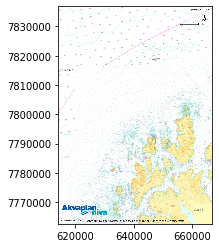

In [6]:
[coords, img] = geoplot('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/printout')

### SeaPatches2018 Sample Station

In [7]:
SP_stations_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SeaPatchesStations.xlsx',header=0)

In [8]:
SP_lons = SP_stations_df['longitude (deg)']
SP_lats = SP_stations_df['latitude (deg)']
stn_num = SP_stations_df['Station']


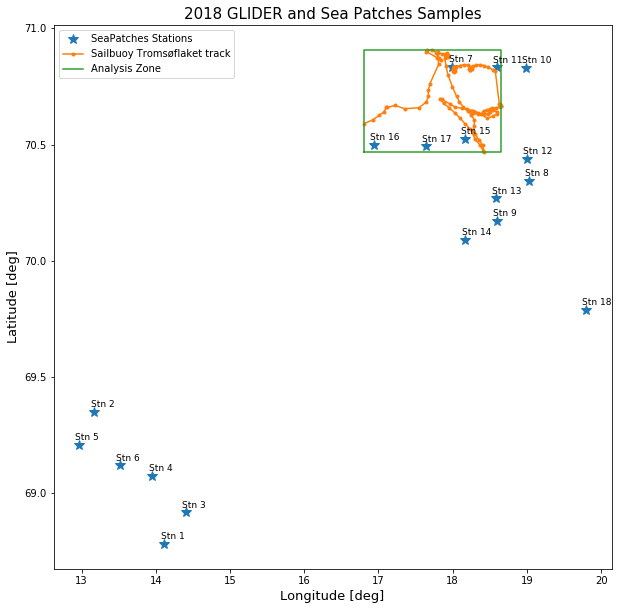

In [9]:
plt.figure(figsize=(10,10))
# Stations
plt.plot(SP_lons, SP_lats, '*', label='SeaPatches Stations', markersize=10)
for num in range(0,len(stn_num)):
    plt.text(SP_lons[num]-0.05, SP_lats[num]+0.02, 'Stn ' + str(stn_num[num]), fontsize=9)
# SB tracks
plt.plot(SB_env_df['longitude (deg)'],SB_env_df['latitude (deg)'], '.-', label='Sailbuoy Tromsøflaket track')
plt.plot([lon_min, lon_min, lon_max, lon_max, lon_min], [lat_min, lat_max, lat_max, lat_min, lat_min], '-', label='Analysis Zone')
plt.xlabel('Longitude [deg]', axis_font)
plt.ylabel('Latitude [deg]', axis_font)
plt.title('2018 GLIDER and Sea Patches Samples', title_font)
plt.legend()

The stations that will be used to compare Sailbuoy broadband echosounder data to Sea Patches tows are **Stn 7, Stn 11, Stn 15, Stn 16, Stn 17**. These stations are within the analysis zone.

## Tucker Trawl data from selected stations
Tucket trawl 1000 μm mesh. The net was trawled for 15 min at 2 kn.
The depth of the tow varies with the station
Station 7 at 25 m
Station 11 at 30 m
Station 15 at 30 m
Station 16 at 20 m
Station 17 at 20 m

These depths at approx. in the middle of the Sailbuoy WBT mini 333 kHz range.

In [10]:
TuckerTrawl_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_Tucker.xlsx',header=0, index_col=0)

In [11]:
TuckerTrawl_df

,Station 2,Station 3,Station 4,Station 5,Station 6,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17,Station 18
Species,,,,,,,,,,,,,,,,,
Calanus,0.632066,0.341304,0.085599,0.718644,0.44375,0.673179,0.301282,0.816393,0.833784,0.584046,0.447552,0.729875,0.430341,0.451613,0.547231,0.253968,0.754325
Krill,0.050360,0.164493,0.005539,0.037288,0.05875,0.115453,0.057692,0.072375,0.066216,0.113960,0.111888,0.107335,0.151703,0.146628,0.210098,0.517460,0.197232
Amphipods,0.008222,0.015942,0.007553,0.035593,0.00375,0.017762,0.042735,0.066585,0.020270,0.071225,0.055944,0.046512,0.049536,0.170088,0.027687,0.057143,0.000000
Limacina,0.307297,0.389855,0.886707,0.196610,0.48250,0.138544,0.495726,0.031845,0.043243,0.182336,0.332168,0.069767,0.179567,0.129032,0.182410,0.088889,0.006920
Gelatinous,0.001028,0.012319,0.010070,0.008475,0.00500,0.003552,0.000000,0.000000,0.000000,0.005698,0.003497,0.000000,0.003096,0.020528,0.019544,0.038095,0.000000
Meroplankton,0.001028,0.066667,0.002518,0.000000,0.00125,0.023091,0.098291,0.001221,0.035135,0.037037,0.038462,0.035778,0.179567,0.073314,0.004886,0.031746,0.038062
Other,0.000000,0.009420,0.002014,0.003390,0.00500,0.028419,0.004274,0.011580,0.001351,0.005698,0.010490,0.010733,0.006192,0.008798,0.008143,0.012698,0.003460


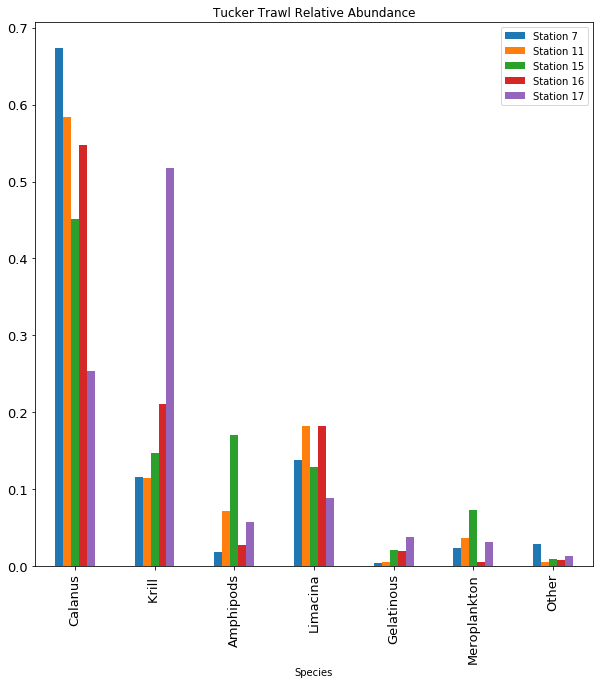

In [12]:
stn = [7,11,15,16,17]
trawl_depth = [25,30,30,20,20]
TuckerTrawl_df[['Station 7','Station 11','Station 15', 'Station 16', 'Station 17']].plot.bar(figsize=(10,10), fontsize=13, title='Tucker Trawl Relative Abundance')

Most stations have =>45% of Calanus and ~ 20% Krill. Station 17 has the opposite abundance with more Krill (51%) than Calanus (25%).

## MultiNetTrawl
Hydrobios Multinet (0.25 m2) with mesh size 180 μm. Samples were taken from 5 depth strata. I will only use depth 0, 5 and 10 and 30 m. Unfortunately at station 7 the multinet did not close.